## Data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
ls

clients.csv  Data.ipynb  materials.csv  plants.csv  transactions.parquet


In [3]:
data_clients = pd.read_csv('clients.csv')
data_materials = pd.read_csv('materials.csv')
data_plants = pd.read_csv('plants.csv')
data_transaction = pd.read_parquet('transactions.parquet')

In [4]:
data_materials.set_index('material', inplace=True)

In [5]:
data_client_date = pd.DataFrame(data_transaction.groupby(['client_id', 'chq_date'])['material'].apply(list))

In [7]:
data_client_date_sum = data_transaction.groupby(['client_id', 'chq_date'])['sales_sum'].sum()

## Merging the tables

* Our aim to get the list of regular purchases for each client
* For this we merge tables Transactions and Materials in order to have information about most popular subcategories

In [8]:
def category(g):
    return data_materials.loc[g, 'hier_level_4']

In [9]:
def regular(l, k=7):
    c = Counter()
    for s in l:
        for g in set(s):
            try:
                c[category(g)] += 1
            except:
                pass
    return [g[0] for g in c.most_common(k)]

In [10]:
data_client_populars = data_client_date.groupby(['client_id'])['material'].apply(list).apply(regular)

In [31]:
sum_sales_per_material = data_transaction.groupby(['material'])['sales_sum'].apply(sum)

In [11]:
client_populars = pd.DataFrame(data_client_populars)

In [32]:
client_populars.head()

,material
client_id,
0000d48a8891cd462fdf01ea861ec53e,"[91534231d73afa8f5765e15d83711a52, 7eb63217014..."
00028a1dcb30863404a386961a69300e,"[5bf563e8f99ed820f322704e4898df6b, cc5db3223b7..."
0004274683494a9eca5e70ef97299d55,"[d390d3da2959fcf07b08b99257b0f310, 88bc8e4c598..."
00072f81efcb3481861f7300c5e2a88a,"[52cbb5dbb41a50faf776f1a19ba39402, 8ccc801ac01..."
00076596eb749cf10c2e984621dffe95,"[5bf563e8f99ed820f322704e4898df6b, 7cb5a0b09f0..."


## Constructing the Embedding using tSNE

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()

In [25]:
texts = [' '.join(s) for s in client_populars['material'].to_list()]

In [27]:
X = vectorizer.fit_transform(texts)

In [29]:
X.shape

(100000, 1790)

In [30]:
from sklearn.manifold import TSNE

In [33]:
transformed_data = TSNE(n_components=2, n_jobs=-1).fit_transform(X)

## Clustering algorithms

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(transformed_data)
labels = kmeans.predict(transformed_data)

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

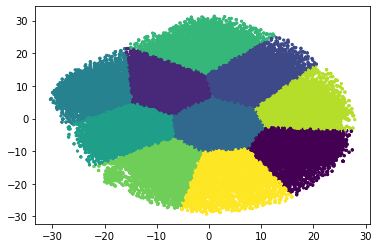

In [39]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=labels, s=5);

## Future work

* experiments with other clustering techniques
* training NN embedding using Jackard similarity